<a href="https://colab.research.google.com/github/djambar/courses/blob/master/graph_mining_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h2>DSSP<br>Lab: 27/06/2020<br>Graph Mining using Python<br></h2>G. Nikolentzos, C. Xypolopoulos, M. Vazirgiannis</center>

## 1. Description
The goal of this lab is to work with graph (or network) data using the [NexworkX](http://networkx.github.io/) library of Python. We will use this library to perform data analytics tasks on graphs. The lab is divided into three parts.
In the first part, we will analyze a collaboration network. Then, we will implement a well-known algorithm to reveal the community structure of a simple network. Finally, we will use graph kernels to measure the similarity between graphs and to perform graph classification.

## 2. Analyzing a Real-World Graph
In the first part of the lab, we will analyze the `CA-GrQc` collaboration network, examining several structural properties. Arxiv GR-QC (General Relativity and Quantum Cosmology) collaboration network comes from the e-print arXiv and covers scientific collaborations between authors of papers submitted to General Relativity and Quantum Cosmology category. If an author $i$ co-authored a paper with another author $j$, the graph contains an undirected edge from $i$ to $j$. 

The graph is stored in the `CA-GrQc.txt` file as an edge list. Below you can see the first lines of the file.

``` html
# Directed graph (each unordered pair of nodes is saved once): CA-GrQc.txt 
# Collaboration network of Arxiv General Relativity category (there is an 
edge if authors coauthored at least one paper)
# Nodes: 5242 Edges: 28980
# FromNodeId	ToNodeId
3466	937
3466	5233
...
```

Your first task is to load the network data into a *directed* graph $G$, using the [`read_edgelist()`](https://networkx.github.io/documentation/stable/reference/readwrite/generated/networkx.readwrite.edgelist.read_edgelist.html) function of NetworkX. Note that the delimeter used to separate values is the tab character '\t' and additionaly, the text that follows the '#' character corresponds to comments. The general syntax of the function is the following:

    G = read_edgelist(path, comments='#', delimiter='\t', create_using=nx.Graph())
    
<u>Tasks</u>:
- Load the dataset using the `read_edgelist()` function.
- Print the number of nodes and the number of the edges of the dataset (use the [`number_of_nodes()`](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.DiGraph.number_of_nodes.html#networkx.DiGraph.number_of_nodes) and [`number_of_edges()`](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.DiGraph.number_of_edges.html#networkx.DiGraph.number_of_edges) functions of NetworkX).

In [ ]:
import networkx as nx
import urllib

G = nx.read_edgelist(urllib.request.urlopen('http://www.db-net.aueb.gr/nikolentzos/dssp/graph_mining/data/CA-GrQc.txt'), comments='#', delimiter='\t', create_using=nx.Graph())

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

to_delete = list()
for edge in G.edges():
  if edge[0] == edge[1]:
    to_delete.append(edge)

for edge in to_delete:
  G.remove_edge(edge[0], edge[1])

print("Number of nodes after removing self-loops:", G.number_of_nodes())
print("Number of edges after removing self-loops::", G.number_of_edges())

Number of nodes: 5242
Number of edges: 14496
Number of nodes after removing self-loops: 5242
Number of edges after removing self-loops:: 14484


We will next compute the number of connected components of the graph, and extract the largest connected component. A connected component is a subgraph in which any two vertices are connected to each other by paths.

<u>Tasks</u>:
- Compute the number of connected components of the graph (use the [`number_connected_components()`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.number_connected_components.html#networkx.algorithms.components.number_connected_components) function of NetworkX)
- Extract the largest connected component and print its number of nodes and number of the edges (use the [`connected_components()`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html#networkx.algorithms.components.connected_components) and [`subgraph()`](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html) functions of NetworkX).
- What is the proportion of nodes that belong to the largest connected component?

In [ ]:
print("Number of connected components:", nx.number_connected_components(G))

largest_cc = max(nx.connected_components(G), key=len)
print("Number of nodes in giant connected component:", len(largest_cc))

GC = G.subgraph(largest_cc)
print("Number of edges of giant component:", GC.number_of_edges())
print("Proportion of nodes in giant connected component:", len(largest_cc)/G.number_of_nodes())

Number of connected components: 355
Number of nodes in giant connected component: 4158
Number of edges of giant component: 13422
Proportion of nodes in giant connected component: 0.7932086989698588


We will next analyze the degree distribution of the graph.

<u>Tasks</u>:
- Run the following code to extract the degree sequence of the graph.

In [ ]:
degree_sequence = list(dict(GC.degree()).values())
print(degree_sequence)

[8, 5, 2, 5, 13, 10, 17, 3, 4, 8, 3, 34, 7, 10, 2, 17, 25, 8, 1, 21, 29, 3, 2, 14, 12, 11, 4, 20, 1, 4, 2, 24, 13, 8, 6, 4, 18, 7, 1, 1, 16, 32, 9, 10, 22, 23, 1, 7, 16, 23, 6, 2, 2, 32, 9, 7, 1, 4, 3, 2, 6, 5, 6, 4, 2, 3, 3, 30, 17, 9, 25, 9, 68, 31, 15, 9, 31, 68, 5, 13, 11, 22, 21, 20, 25, 4, 9, 9, 6, 20, 13, 14, 27, 8, 3, 7, 13, 14, 9, 4, 63, 81, 30, 77, 22, 4, 37, 1, 2, 9, 1, 6, 6, 1, 2, 4, 18, 18, 2, 2, 4, 19, 11, 2, 2, 5, 7, 2, 2, 1, 7, 1, 3, 16, 2, 6, 3, 5, 4, 5, 1, 10, 3, 11, 20, 21, 18, 18, 9, 2, 8, 4, 21, 2, 9, 5, 2, 62, 18, 12, 10, 11, 1, 12, 5, 13, 4, 7, 4, 5, 3, 2, 11, 3, 12, 13, 2, 1, 3, 12, 4, 1, 3, 3, 33, 7, 4, 5, 10, 12, 3, 10, 6, 3, 9, 11, 2, 2, 2, 4, 5, 8, 10, 4, 3, 30, 2, 8, 5, 7, 7, 12, 16, 10, 3, 2, 2, 7, 3, 49, 7, 3, 8, 12, 11, 13, 18, 10, 26, 9, 12, 2, 6, 2, 12, 2, 11, 8, 22, 26, 13, 12, 38, 19, 2, 4, 11, 11, 14, 17, 29, 27, 15, 11, 30, 5, 21, 49, 42, 48, 55, 56, 47, 65, 45, 49, 1, 54, 45, 43, 1, 46, 45, 56, 45, 49, 45, 77, 48, 4, 57, 45, 46, 60, 45, 4, 66, 45,

<u>Tasks</u>:
- Find and print the minimum, maximum, median and mean degree of the nodes of the graph (you can use the built-in functions `min, max, median` and `mean` of the `NumPy` library)

In [ ]:
import numpy as np

print("Minimum Degree:", np.min(degree_sequence))
print("Maximum Degree:", np.max(degree_sequence))
print("Median Degree:", np.median(degree_sequence))
print("Mean Degree:", np.mean(degree_sequence))

Minimum Degree: 1
Maximum Degree: 81
Median Degree: 3.0
Mean Degree: 6.455988455988456


Let's now compute and plot the degree distribution of the graph.

<u>Tasks</u>:
- Use the [`degree_histogram()`](https://networkx.github.io/documentation/stable/reference/generated/networkx.classes.function.degree_histogram.html#networkx.classes.function.degree_histogram) function of NetworkX to obtain a list of the frequency of each degree value.
- Plot the degree histogram using the [`plot()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) function of matplotlib.

Text(0, 0.5, 'frequency')

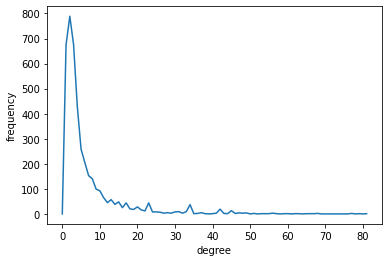

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

hist = nx.degree_histogram(GC)
plt.plot(hist)
plt.xlabel('degree')
plt.ylabel('frequency')

<u>Tasks</u>:
- Produce again the plot using a log-log axis (use the [`loglog()`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.loglog) function of matplotlib).

Text(0, 0.5, 'frequency')

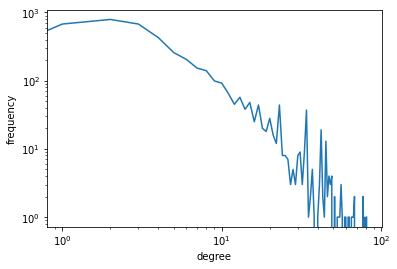

In [ ]:
plt.loglog(hist)
plt.xlabel('degree')
plt.ylabel('frequency')

Next, we will compute the average clustering coefficient of the graph, which is a measure of the degree to which nodes in a graph tend to cluster together, i.e., to create tightly knit groups characterized by a relatively high density of ties. The *global clustering coefficient* is based on triplets of nodes. A triplet consists of three nodes that are connected by either two (open triplet) or three (closed triplet) undirected ties. A triangle consists of three closed triplets, one centered on each of the nodes. The global clustering coefficient is the number of closed triplets (or $3$ $\times$ triangles) over the total number of triplets (both open and closed).

<u>Tasks</u>:
- Use the [`average_clustering()`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.average_clustering.html#networkx.algorithms.cluster.average_clustering) function of NetworkX to compute the average clustering coefficient of the graph.

In [ ]:
print("Clustering coefficient:", nx.average_clustering(GC))

Clustering coefficient: 0.5568782161697923


Let's now repeat some parts of the above experiment for a random graph. A *random graph* is obtained by starting with a set of $n$ isolated vertices and adding successive edges between them at random. In our case, we will create a random graph using the Erdos-Renyi $G(n,p)$ random graph model, where the graph contains $n$ nodes and each of the edges is included with probability $p$.

<u>Tasks</u>:
- Create a random graph $R$ using the $G(1000, 0.1)$ model (i.e. 1000 nodes and $p=0.1$) (use the [`fast_gnp_random_graph()`](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.generators.random_graphs.fast_gnp_random_graph.html#networkx.generators.random_graphs.fast_gnp_random_graph) function of NetworkX)

In [ ]:
R = nx.fast_gnp_random_graph(1000, 0.01)

print('Number of nodes:', R.number_of_nodes())
print('Number of edges:', R.number_of_edges())

Number of nodes: 1000
Number of edges: 5001


<u>Tasks</u>:
- Compute again the minimum, maximum, median and mean degree of the nodes of the graph.
- Plot the degree histogram of the graph.

Minimum Degree: 2
Maximum Degree: 23
Median Degree: 10.0
Mean Degree: 9.98


Text(0, 0.5, 'frequency')

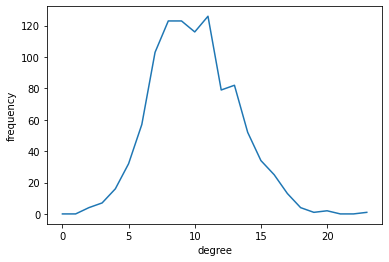

In [ ]:
degree_sequence = list(dict(R.degree()).values())

print("Minimum Degree:", np.min(degree_sequence))
print("Maximum Degree:", np.max(degree_sequence))
print("Median Degree:", np.median(degree_sequence))
print("Mean Degree:", np.mean(degree_sequence))

hist = nx.degree_histogram(R)
plt.plot(hist)
plt.xlabel('degree')
plt.ylabel('frequency')

In order to make more clear the difference of the structural properties between real-world (e.g. social networks, collaboration networks) and random networks, we can examine additional properties similar to the case of `CA-GrQc` previously. We will focus on the clustering properties, trying to stress out that random graphs do not inherently show a clustering structure.

<u>Tasks</u>:
- Compute the average clustering coefficient of the randomly generated graph.

In [ ]:
print("Clustering coefficient:", nx.average_clustering(R))

Clustering coefficient: 0.009180242633183807


Text(0, 0.5, 'frequency')

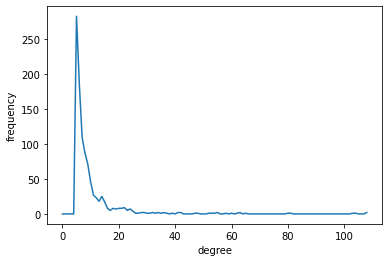

In [ ]:
Q = nx.barabasi_albert_graph(1000, 5)
hist = nx.degree_histogram(Q)
plt.plot(hist)
plt.xlabel('degree')
plt.ylabel('frequency')

## 3. Community Detection
In the second part of the lab, we will focus on the community detection (or clustering) problem in graphs. Typically, a community corresponds to a set of nodes that highly interact among each other, compared to the intensity of interactions (as expressed by the number of edges) with the rest nodes of the graph. The experiments for this part will be performed in the *karate* dataset, a small dataset that has been used as a benchmark in several community detection algorithms. This dataset is a friendship social network between 34 members of a karate club at a US university in the 1970.

<u>Tasks</u>:
- Load the graph using the NetworkX library.
- Print the number of nodes and the number of edges of the network.

In [ ]:
G = nx.read_edgelist(urllib.request.urlopen('http://www.db-net.aueb.gr/nikolentzos/dssp/graph_mining/data/karate.edgelist'), comments='#', delimiter=' ', create_using=nx.Graph())

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 34
Number of edges: 78


We will first implement and apply a very popular graph clustering algorithm, called Spectral Clustering. The basic idea of the algorithm is to utilize information associated to the spectrum of the graph, in order to identify well-separated clusters. The pseudocode of Spectral Clustering is shown below:

1. Let $\mathbf{A}$ be the adjacency matrix of the graph
2. Compute the Laplacian matrix $\mathbf{L} = \mathbf{D}−\mathbf{A}$. Matrix $\mathbf{D}$ corresponds to the diagonal degree matrix of graph $G$ (i.e., degree of each node $v$ (= number of neighbors) in the main diagonal)
3. Apply eigenvalue decomposition to the Laplacian matrix $\mathbf{L}$ and compute the eigenvectors that correspond to $k$ smallest eigenvalues. Let $\mathbf{U} = [\mathbf{u}_1|\mathbf{u}_2| \ldots |\mathbf{u}_k] \in \mathbb{R}^{n \times k}$ be the matrix containing these eigenvectors as columns
4. For $i = 1,\ldots,n$, let $y_i \in \mathbb{R}^k$ be the vector corresponding to the $i$-th row of $\mathbf{U}$. Apply $k$-means to the points $(y_i)_{i=1,\ldots,n}$ (i.e., the rows of $\mathbf{U}$) and find clusters $C_1, C_2, \ldots, C_k$

<u>Tasks</u>:
- Implement the Spectral Clustering algorithm. To compute the Laplacian matrix $\mathbf{L}$, you can use the [`laplacian_matrix()`](https://networkx.github.io/documentation/stable/reference/generated/networkx.linalg.laplacianmatrix.laplacian_matrix.html#networkx.linalg.laplacianmatrix.laplacian_matrix) function of NetworkX. To decompose the Laplacian matrix, you can use the [`eigs()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.eigs.html) function of SciPy. Finally, to perform k-means, you can use scikit-learn's [implementation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) of the algorithm. The Spectral Clustering algorithm must return a dictionary keyed by node to the cluster to which the node belongs.
- After implementing the algorithm, apply it to the `karate` dataset, trying to identify 2 clusters.

In [ ]:
from scipy.sparse.linalg import eigs
from sklearn.cluster import KMeans

def spectral_clustering(G, k):
    
    L = nx.laplacian_matrix(G).astype(np.float64)
    eigvals, eigvec = eigs(L, k=k, which='SR')

    #print(eigvec[:,0].real)
    eigvec = eigvec[:,1:].real

    kmeans = KMeans(n_clusters=k)
    kmeans.fit(eigvec)

    clustering = dict()
    for i, node in enumerate(G.nodes()):
      clustering[node] = kmeans.labels_[i]
    
    return clustering

clustering = spectral_clustering(G, 2)
print(clustering)

{'1': 0, '2': 1, '3': 1, '4': 1, '5': 0, '6': 0, '7': 0, '8': 1, '9': 1, '10': 1, '11': 0, '12': 0, '13': 0, '14': 1, '17': 0, '18': 0, '20': 1, '22': 0, '24': 1, '26': 1, '25': 1, '28': 1, '29': 1, '30': 1, '27': 1, '31': 1, '32': 1, '33': 1, '15': 1, '16': 1, '19': 1, '21': 1, '23': 1, '34': 1}


We will next visualize the clustering result.

<u>Task</u>:
- Use the [`draw`](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw) function of NetworkX to visualize the `karate` network. Use the same color for all the nodes belonging to the same cluster.

[0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


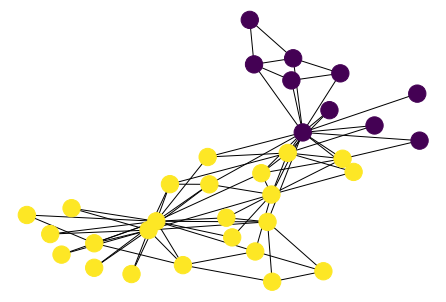

In [ ]:
colors = [clustering[node] for node in G.nodes()]
print(colors)

nx.draw(G, node_color=colors)

To assess the quality of a clustering algorithm, several metrics have been proposed. Modularity is one of the most popular and widely used metrics to evaluate the quality of a network's partition into communities. Considering a specific partition of the network into clusters, modularity measures the number of edges that lie within a cluster compared to the expected number of edges of a null graph (or configuration model), i.e., a random graph with the same degree distribution. In other words, the measure of modularity is built upon the idea that random graphs are not expected to present inherent community structure; thus, comparing the observed density of a subgraph with the expected density of the same subgraph in case where edges are placed randomly, leads to a community evaluation metric. Modularity is given by the following formula:
$$ Q = \sum^{n_c} \Bigg[ \frac{l_c}{m} - \Big(\frac{d_c}{2m}\Big)^2\Bigg] $$
where, $m=|E|$ is the total number of edges in the graph, $n_c$ is the number of communities in the graph, $l_c$ is the number of edges within the community $c$ and $d_c$ is the sum of the degrees of the nodes that belong to community $c$. Modularity takes values in the range $[-1, 1]$, with higher values indicating better community structure.

<u>Task</u>:
- Implement a function that given a graph and and an assignment of nodes to clusters, computes the modularity of the clustering result. Given a set of nodes, you can use the [`subgraph()`](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html) function of NetworkX to extract the subgraph induced by these nodes.

In [ ]:
def modularity(G, clustering):
  modularity = 0
  m = G.number_of_edges()
  clusters = set(clustering.values())

  for cluster in clusters:
    nodes = [node for node in G.nodes() if clustering[node]==cluster]
    subG = G.subgraph(nodes)
    lc = subG.number_of_edges()

    dc = 0
    for node in nodes:
      dc += G.degree(node)

    modularity += lc/m - (dc/(2*m))**2
  
  return modularity

In [ ]:
print(modularity(G, clustering))

0.233974358974359


Next, we will use modularity to compare the following two clustering results of the `karate` dataset: (i) the one obtained by the Spectral Clustering algorithm, and (ii) the one obtained if we randomly partition the nodes into 2 clusters.
To assign each node to a cluster, use the `randint(a,b)` function which returns a random integer $n$ such that $a \leq n \leq b$.

<u>Tasks</u>:
- Assign the nodes of the `karate` network randomly to 2 clusters to generate a random partitioning of the network.
- Compare the two clustering results. What is the performance of the Spectral Clustering algorithm compared to the algorithm that randomly clusters the nodes?

In [ ]:
from random import randint

random_clustering = dict()
for node in G.nodes():
  random_clustering[node] = randint(0,1)

print("Modularity of random clustering:", modularity(G, random_clustering))

Modularity of random clustering: -0.050295857988165577


In [ ]:
from networkx.algorithms.community import greedy_modularity_communities

c = list(greedy_modularity_communities(G))
greedy_clustering = dict()
for i,s in enumerate(c):
  for node in s:
    greedy_clustering[node] = i

print("Modularity of greedy clustering:", modularity(G, greedy_clustering))

Modularity of greedy clustering: 0.3806706114398422


## 3. Graph Classification
In the last part of the lab, we will focus on the problem of graph classification. Graph classification arises in the context of a number of classical domains such as chemical data, biological data, and the web. In order to perform graph classification, we will employ graph kernels, a powerful framework for graph comparison.

Kernels can be intuitively understood as functions measuring the similarity of pairs of objects. More formally, for a function $k(x,x')$ to be a kernel, it has to be (1) symmetric: $k(x,x') = k(x',x)$, and (2) positive semi-definite. If a function satisfies the above two conditions on a set $\mathcal{X}$, it is known that there exists a map $\phi : \mathcal{X} \to \mathcal{H}$ into a Hilbert space $\mathcal{H}$, such that $k(x,x') = \langle \phi(x), \phi(x') \rangle$ for all $(x, x') \in \mathcal{X}^2$ where $\langle\cdot, \cdot\rangle$ is the inner product in $\mathcal{H}$. Kernel functions thus compute the inner product between examples that are mapped in a higher-dimensional feature space. However, they do not necessarily explicitly compute the feature map $\phi$ for each example. One advantage of kernel methods is that they can operate on very general types of data such as images and graphs. Kernels defined on graphs are known as *graph kernels*. Most graph kernels decompose graphs into their substructures and then to measure their similarity, they count the number of common substructures. Graph kernels typically focus on some structural aspect of graphs such as random walks, shortest paths, subtrees, cycles, and graphlets.

We will first create a very simple graph classification dataset. The dataset will contain two types of graphs: (1) cycle graphs, and (2) path graphs. A cycle graph $C_n$ is a graph on $n$ nodes containing a single cycle through all nodes, while a path graph $P_n$ is a tree with two nodes of degree 1, and all the remaining $n-2$ nodes of degree 2. Each graph is assigned a class label: label 0 if it is a cycle or label 1 if it is a path. The Figure below illustrates such a dataset consisting of three cycle graphs and three path graphs.

<img src="http://www.db-net.aueb.gr/nikolentzos/dssp/graph_mining/figures/synthetic_graphs.png" width="500"/>
    
<u>Task</u>:
- Use the [`cycle_graph()`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.cycle_graph.html#networkx.generators.classic.cycle_graph) and [`path_graph()`](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.path_graph.html#networkx.generators.classic.path_graph) functions of NetworkX to generate 100 cycle graphs and 100 path graphs of size $n=3,\ldots,102$, respectively. Store the 200 graphs in a list $Gs$ and their class labels in another list $y$.

In [ ]:
Gs = list()
y = list()

for i in range(3, 103):
  Gs.append(nx.cycle_graph(i))
  y.append(0)

  Gs.append(nx.path_graph(i))
  y.append(1)

print("Size of the dataset:", len(Gs))

Size of the dataset: 200


We will next investigate if graph kernels can distinguish cycle graphs from path graphs. To this end, we will make use of the shortest path kernel, a kernel that compares shortest path lengths in two graps. Before computing the kernel, it is necessary to split the dataset into a training and a test set. We can use the [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of scikit-learn as follows:
    
    from sklearn.model_selection import train_test_split

    G_train, G_test, y_train, y_test = train_test_split(Gs, y, test_size=0.1)
    
<u>Task</u>:
- Split the dataset into a training and a test set.

In [ ]:
from sklearn.model_selection import train_test_split

G_train, G_test, y_train, y_test = train_test_split(Gs, y, test_size=0.1)

The shortest path kernel compares the length of shortest paths of two graphs. More specifically, given two graphs $G=(V,E)$ and $G'=(V',E')$, the shortest path kernel is defined as:

$$
k(G,G') = \sum_{(v_1,v_2) \in V \times V} \sum_{(v'_1,v'_2) \in V' \times V'} k_{length}(sp_{v_1,v_2}, sp_{v'_1,v'_2})
$$

where $k_{length}$ is a kernel on shortest path lengths, and $sp_{v_i,v_j}$ is the length of the shortest path between vertices $v_i$ and $v_j$. We will use the following kernel for comparing shortest path lengths:

$$
k_{length}(sp_{v_1,v_2}, sp_{v'_1,v'_2}) = \left\{
            \begin{array}{lr}
                1 & \text{if }sp_{v_1,v_2} = sp_{v'_1,v'_2},\\
                0 & \text{otherwise}
            \end{array}
            \right.
$$

Therefore, $k_{length}(sp_{v_1,v_2}, sp_{v'_1,v'_2})$ is equal to 1 if $sp_{v_1,v_2}$ and $sp_{v'_1,v'_2}$ are equal to each other, and $0$ otherwise.

Below you are given a function that takes as input two sets of graphs (of sizes $N_1$ and $N_2$), and computes the kernel matrix $K \in \mathbb{R}^{N_1\times N_2}$ which stores the kernel values between the graphs of the first set and those of the second set.

In [ ]:
def sp_kernel(Gs1, Gs2):
    N1 = len(Gs1)
    N2 = len(Gs2)
    
    all_paths = dict()
    sp_counts = dict()
    
    for i,G in enumerate(Gs1):
        sp_lengths = dict(nx.shortest_path_length(G))
        sp_counts[i] = dict()
        nodes = G.nodes()
        for v1 in nodes:
            for v2 in nodes:
                if v2 in sp_lengths[v1]:
                    length = sp_lengths[v1][v2]
                    if length in sp_counts[i]:
                        sp_counts[i][length] += 1
                    else:
                        sp_counts[i][length] = 1

                    if length not in all_paths:
                        all_paths[length] = len(all_paths)
                        
    for i,G in enumerate(Gs2):
        sp_lengths = dict(nx.shortest_path_length(G))
        sp_counts[N1+i] = dict()
        nodes = G.nodes()
        for v1 in nodes:
            for v2 in nodes:
                if v2 in sp_lengths[v1]:
                    length = sp_lengths[v1][v2]
                    if length in sp_counts[N1+i]:
                        sp_counts[N1+i][length] += 1
                    else:
                        sp_counts[N1+i][length] = 1

                    if length not in all_paths:
                        all_paths[length] = len(all_paths)

    phi1 = np.zeros((N1, len(all_paths)))
    for i in range(N1):
        for length in sp_counts[i]:
            phi1[i,all_paths[length]] = sp_counts[i][length]
            
    phi2 = np.zeros((N2, len(all_paths)))
    for i in range(N2):
        for length in sp_counts[N1+i]:
            phi2[i,all_paths[length]] = sp_counts[N1+i][length]

    K = np.dot(phi1,phi2.T)

    return K

We are interested in generating two matrices. A symmetric matrix $\mathbf{K}_{train}$ which contains the kernel values for all pairs of training graphs, and a second matrix $\mathbf{K}_{test}$ which stores the kernel values between the graphs of the test set and those of the training set. We can obtain these two matrices very easily using the function defined above. After generating the two kernel matrices, we can use the SVM classifier to perform graph classification.

<u>Tasks</u>:
- Use the shortest path kernel to compute the $\mathbf{K}_{train}$ and $\mathbf{K}_{test}$ matrices.
- Train an [SVM classifier](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and use it to make predictions. Note that we have already pre-computed the kernel matrices (set parameter kernel equal to 'precomputed').  

In [ ]:
from sklearn.svm import SVC

K_train = sp_kernel(G_train, G_train)
print("Train matrix dim:", K_train.shape)

K_test = sp_kernel(G_test, G_train)
print("Test matrix dim:", K_test.shape)

clf = SVC(kernel='precomputed')
clf.fit(K_train, y_train)
y_pred = clf.predict(K_test)

Train matrix dim: (180, 180)
Test matrix dim: (20, 180)


Finally, we will evaluate the shortest path kernel. More specifically, we will compute its classification accuracy.

<u>Tasks</u>:
- Use the [`accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function of scikit-learn to compute the classification accuracy of the shortest path kernel. 

In [ ]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0
